In [ ]:
from metrics import Distance
from matplotlib import pyplot as plt
from metrics import Stoch
import numpy as np
from mlflux.eval import heatmap, annotate_heatmap

%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dir = '/scratch/jw8736/gotm/ensem/2011-01-01_2020-01-01_heat/'
years = (2011,2012,2015,2016)
num1 = {'flux': 'Bulk', 'method': 'kepsilon', 'MINUTE': 10}
num2 = {'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 10}
num3 = {'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 60}
num4 = {'flux': 'ANN', 'method': 'kepsilon', 'MINUTE': 10}
num5 = {'flux': 'ANN', 'method': 'kpp', 'MINUTE': 10}
num6 = {'flux': 'ANN', 'method': 'kpp', 'MINUTE': 60}

In [3]:
# MLD is absolute signed so always positive
# So a negative bias is shallower
bias1 = Distance (years, combo=num4, combo_ref=num1, dir=dir)
bias1.read_compute()
bias2 = Distance (years, combo=num5, combo_ref=num2, dir=dir)
bias2.read_compute()
bias3 = Distance (years, combo=num6, combo_ref=num3, dir=dir)
bias3.read_compute()

Compare between 
{'flux': 'ANN', 'method': 'kepsilon', 'MINUTE': 10}
and
{'flux': 'Bulk', 'method': 'kepsilon', 'MINUTE': 10}
Compare between 
{'flux': 'ANN', 'method': 'kpp', 'MINUTE': 10}
and
{'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 10}
Compare between 
{'flux': 'ANN', 'method': 'kpp', 'MINUTE': 60}
and
{'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 60}


In [4]:
stoch1 = Stoch(years, num4, dir)
stoch1.read_compute()
stoch2 = Stoch(years, num5, dir)
stoch2.read_compute()
# stoch3 = Stoch(years, num6, dir)
# stoch3.read_compute()

2011
Done computing MLD!
2012
Done computing MLD!
2015
Done computing MLD!
2016
Done computing MLD!
2011
Done computing MLD!
2012
Done computing MLD!
2015
Done computing MLD!
2016
Done computing MLD!


### Updated plots

In [2]:
# An ad-hoc version of the plotting function
import matplotlib as mpl
def heatmap_(data, row_labels, col_labels, ax=None, cbarlabel="", XTICK=True, YTICK=True, **kwargs):
    
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    # cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    # cbar.ax.set_xlabel(cbarlabel, va="bottom")

    bbox = ax.get_position()
    cbar_ax = fig.add_axes([
        bbox.x1 + 0.02,   # Left of colorbar (slightly right of subplot)
        bbox.y0 + 0.1* bbox.width,          # Bottom aligns with subplot
        0.08 * bbox.width,             # Width of colorbar
        0.015 * bbox.width       # Height aligns with row
    ])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks=[kwargs['vmin'],0,kwargs['vmax']])
    cbar.ax.set_xlabel(cbarlabel)

    # Show all ticks and label them with the respective list entries.
    if XTICK:
        ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
        # Let the horizontal axes labeling appear on top.
        ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")        
    else:
        ax.set_xticks([])
    if YTICK:
        ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)
    else:
        ax.set_yticks([])

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)
    
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

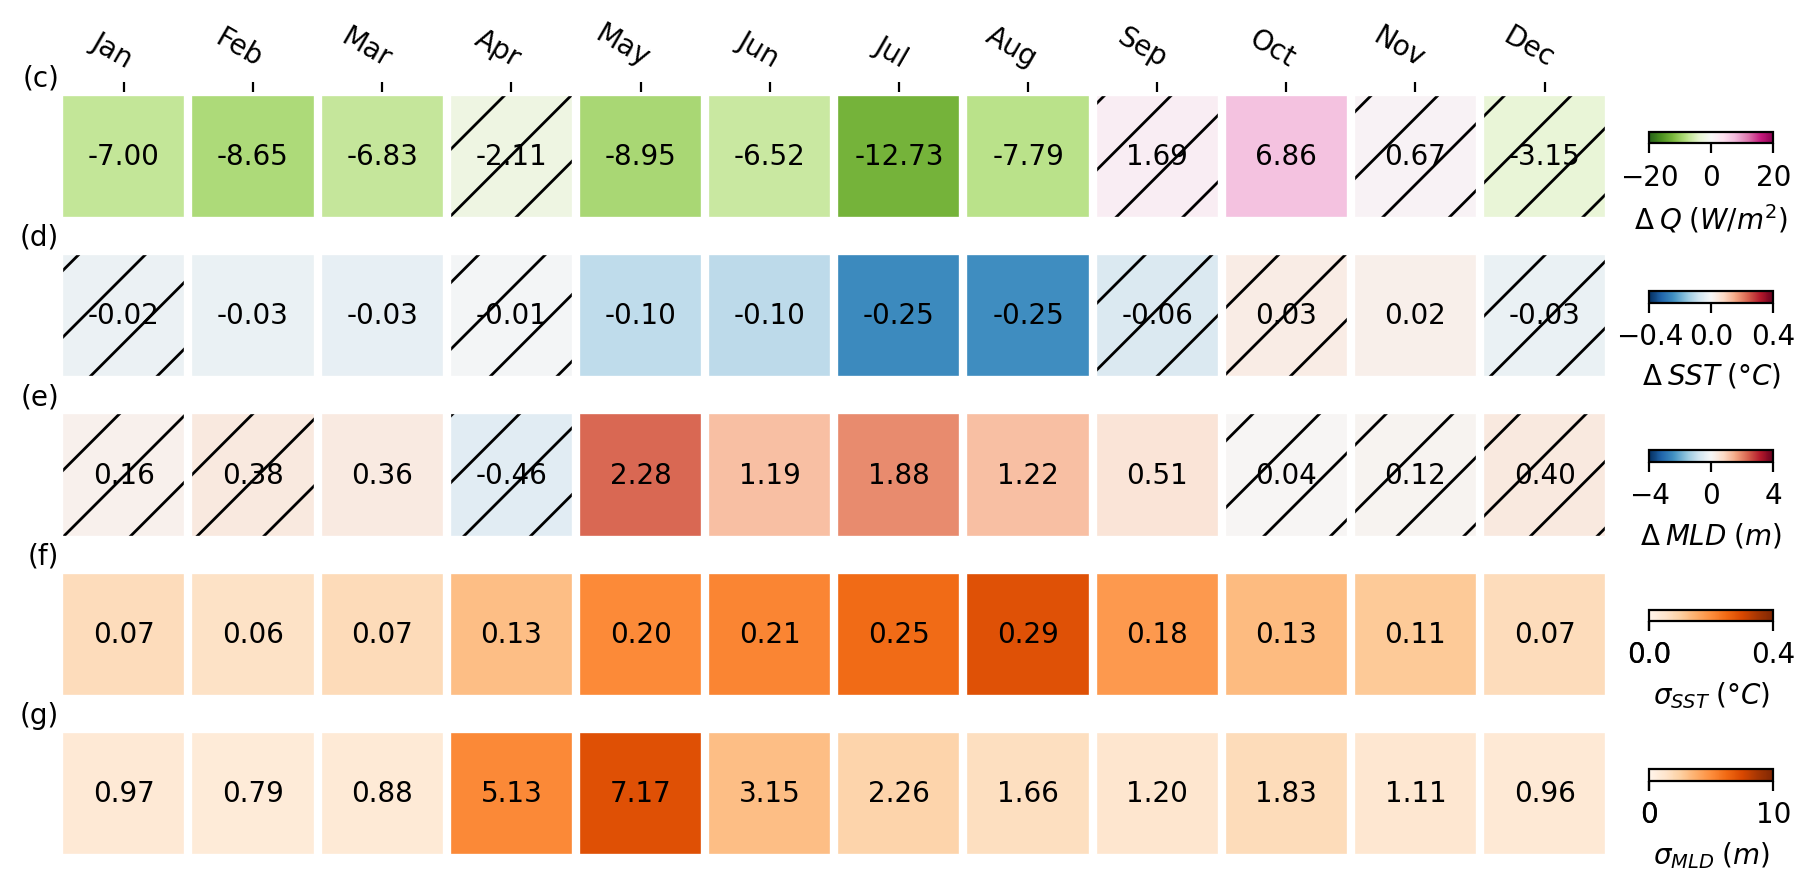

In [114]:
# Modified to have only one mixing scheme
# K-epsilon 10 min
fig, axes = plt.subplots(5, 1, figsize=[10,5], dpi=200, height_ratios=[1,1,1,1,1], sharex=False)
biases = [bias1] 

# Q
ax = axes[0]; option = 'Q_diffs' 
yaver_bias = getattr(biases[0], option).mean(axis=0) 
sign_agree = biases[0].checksigns(option) 
yaver_bias = np.array(yaver_bias).reshape(1,-1); sign_agree = np.array(sign_agree).reshape(1,-1)

col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
im, cbar = heatmap_(yaver_bias, row_labels=[], col_labels=col_labels, ax=ax, cbarlabel=r"$\Delta \: Q \; (W/m^2)$", 
                    XTICK=True, YTICK=False, vmax=20, vmin=-20, cmap='PiYG_r')

texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch
        
# SST
ax = axes[1]; option = 'SST_diffs' 
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap_(yaver_bias, row_labels=[], col_labels=[], ax=ax, cbarlabel="$\Delta \: SST \; (\degree C)$", 
                    XTICK=False, YTICK=False, vmax=0.4, vmin=-0.4, cmap='RdBu_r')
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# MLD
ax = axes[2]; option = 'MLD_diffs'  
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap_(yaver_bias, row_labels=[], col_labels=[], ax=ax, cbarlabel=r"$\Delta \: MLD \; (m)$", 
                    XTICK=False, YTICK=False, vmax=4, vmin=-4, cmap='RdBu_r')
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

########## Stochastic ###########
stochs = [stoch1] 

# SST spread
ax = axes[3]; option = 'SST_stds'  
yaver_stds = np.array([getattr(stoch, option).mean(axis=0) for stoch in stochs])
im, cbar = heatmap_(yaver_stds, row_labels=[], col_labels=[], ax=ax, cbarlabel=r"$\sigma_{SST} \; (\degree C)$", 
                    XTICK=False, YTICK=False, vmax=0.4, vmin=0, cmap='Oranges')
texts = annotate_heatmap(im, data=yaver_stds, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)

# MLD spread
ax = axes[4]; option = 'MLD_stds'  
yaver_stds = np.array([getattr(stoch, option).mean(axis=0) for stoch in stochs])
im, cbar = heatmap_(yaver_stds, row_labels=[], col_labels=[], ax=ax, cbarlabel=r"$\sigma_{MLD} \; (m)$",
                    XTICK=False, YTICK=False, vmax=10, vmin=0, cmap='Oranges')
texts = annotate_heatmap(im, data=yaver_stds, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)

labels = ['(c)','(d)','(e)','(f)','(g)']
for i in range(len(axes)):
    axes[i].text(0., 1., labels[i], transform=axes[i].transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# plt.tight_layout()
plt.savefig(f'../plots/updated_heatmap_ke.png', bbox_inches='tight')
plt.savefig(f'../plots/updated_heatmap_ke.pdf', bbox_inches='tight')

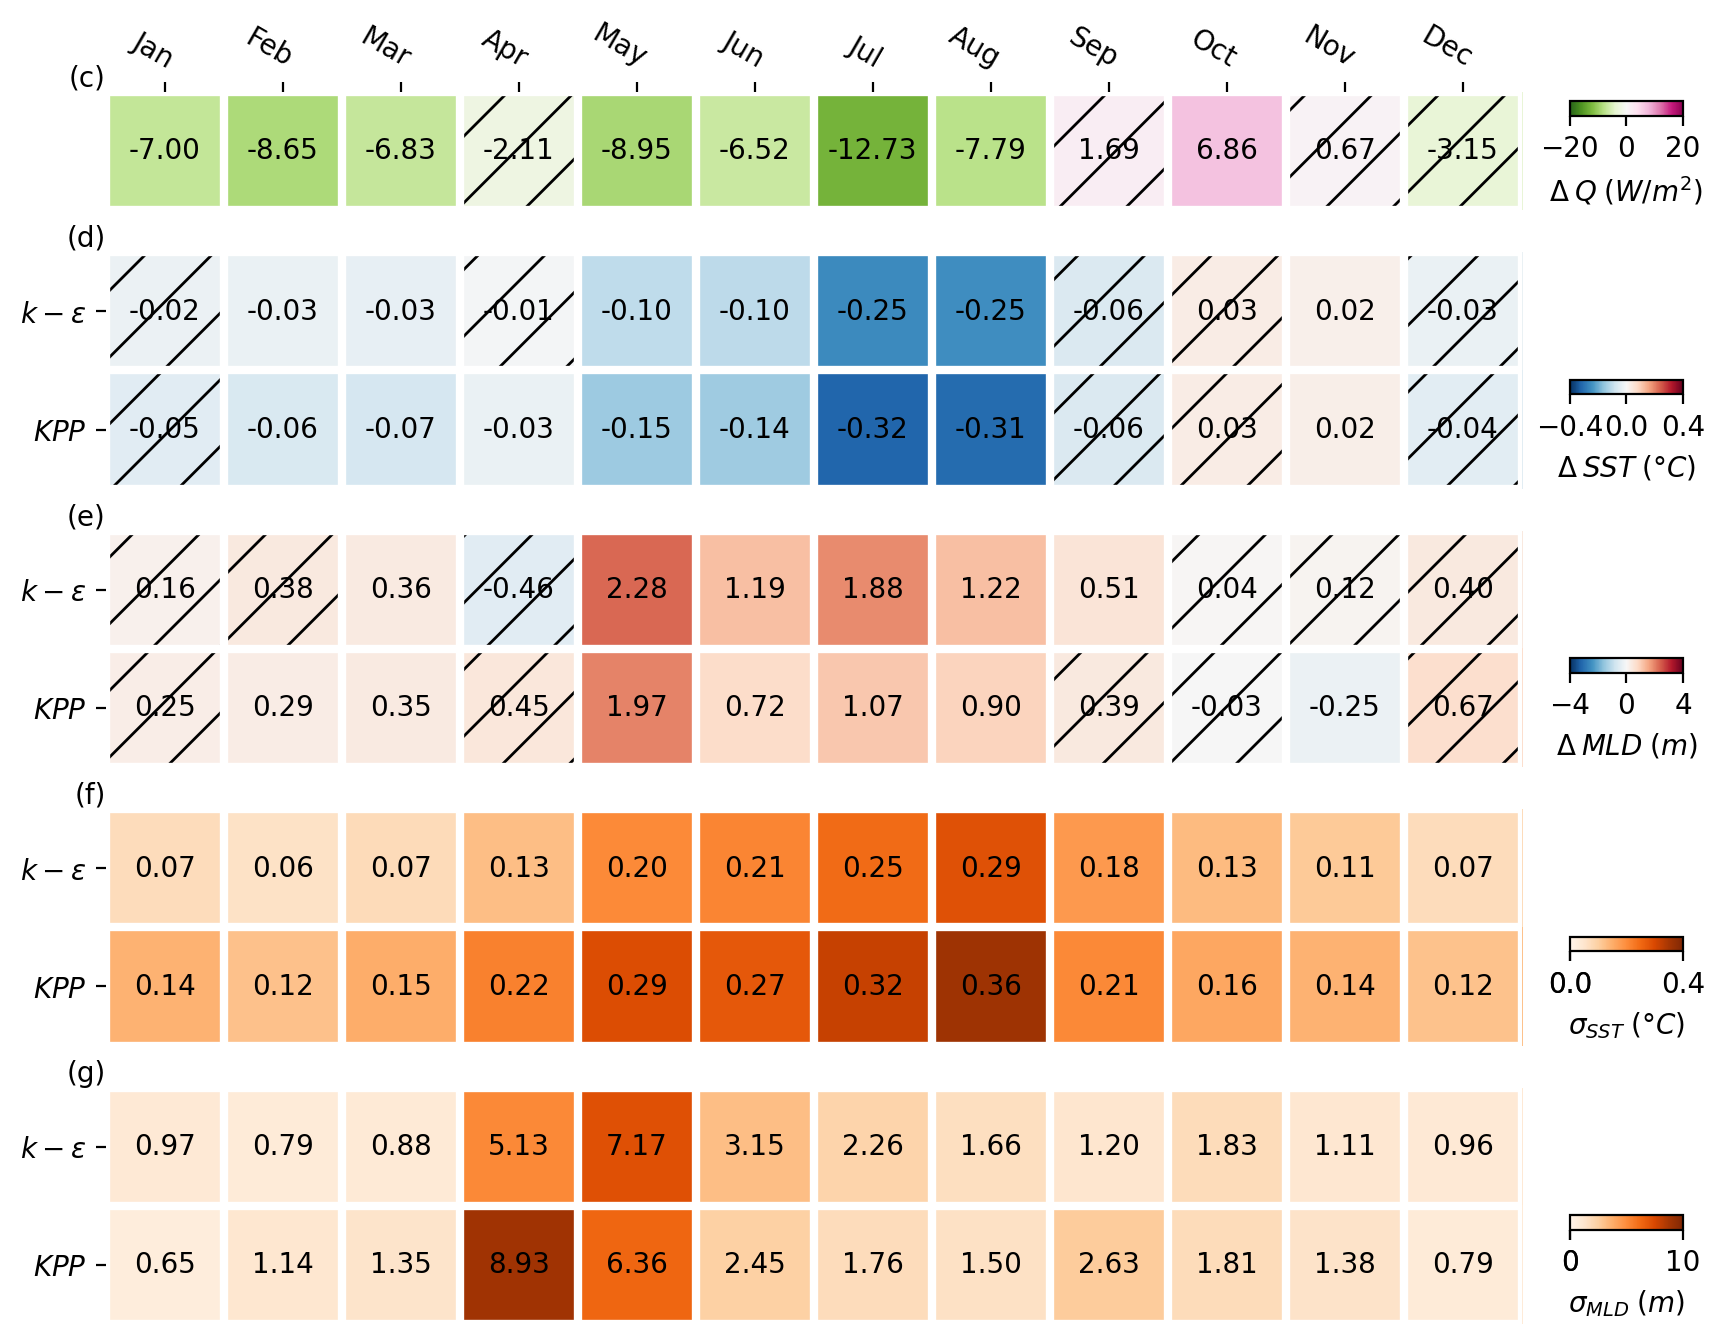

In [ ]:
# Two mixing schemes together
fig, axes = plt.subplots(5, 1, figsize=[12,8], dpi=200, height_ratios=[1,2,2,2,2], sharex=False)
biases = [bias1,bias2] 
row_labels = ['$k-\epsilon$', '$KPP$'] 

# Q
ax = axes[0]; option = 'Q_diffs' 
yaver_bias = getattr(biases[0], option).mean(axis=0) 
sign_agree = biases[0].checksigns(option) 
yaver_bias = np.array(yaver_bias).reshape(1,-1); sign_agree = np.array(sign_agree).reshape(1,-1)

col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
im, cbar = heatmap_(yaver_bias, row_labels=row_labels, col_labels=col_labels, ax=ax, cbarlabel=r"$\Delta \: Q \; (W/m^2)$", 
                    XTICK=True, YTICK=False, vmax=20, vmin=-20, cmap='PiYG_r')

texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch
        
# SST
ax = axes[1]; option = 'SST_diffs' 
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap_(yaver_bias, row_labels=row_labels, col_labels=[], ax=ax, cbarlabel="$\Delta \: SST \; (\degree C)$", 
                    XTICK=False, YTICK=True, vmax=0.4, vmin=-0.4, cmap='RdBu_r')
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# MLD
ax = axes[2]; option = 'MLD_diffs'  
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap_(yaver_bias, row_labels=row_labels, col_labels=[], ax=ax, cbarlabel=r"$\Delta \: MLD \; (m)$", 
                    XTICK=False, YTICK=True, vmax=4, vmin=-4, cmap='RdBu_r')
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

########## Stochastic ###########
stochs = [stoch1, stoch2] 

# SST spread
ax = axes[3]; option = 'SST_stds'  
yaver_stds = np.array([getattr(stoch, option).mean(axis=0) for stoch in stochs])
im, cbar = heatmap_(yaver_stds, row_labels=row_labels, col_labels=[], ax=ax, cbarlabel=r"$\sigma_{SST} \; (\degree C)$", 
                    XTICK=False, YTICK=True, vmax=0.4, vmin=0, cmap='Oranges')
texts = annotate_heatmap(im, data=yaver_stds, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)

# MLD spread
ax = axes[4]; option = 'MLD_stds'  
yaver_stds = np.array([getattr(stoch, option).mean(axis=0) for stoch in stochs])
im, cbar = heatmap_(yaver_stds, row_labels=row_labels, col_labels=[], ax=ax, cbarlabel=r"$\sigma_{MLD} \; (m)$",
                    XTICK=False, YTICK=True, vmax=10, vmin=0, cmap='Oranges')
texts = annotate_heatmap(im, data=yaver_stds, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)

labels = ['(c)','(d)','(e)','(f)','(g)']
for i in range(len(axes)):
    axes[i].text(0., 1., labels[i], transform=axes[i].transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# plt.tight_layout()
plt.savefig(f'../plots/updated_heatmap_together.png', bbox_inches='tight')
plt.savefig(f'../plots/updated_heatmap_together.pdf', bbox_inches='tight')

### Difference between KPP and k-epsilon

In [3]:
dir = '/scratch/jw8736/gotm/ensem/2011-01-01_2020-01-01_heat/'
years = (2011,2012,2015,2016)
num1 = {'flux': 'Bulk', 'method': 'kepsilon', 'MINUTE': 10}
num2 = {'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 10}

# MLD is absolute signed so always positive
# So a negative bias is shallower
bias = Distance (years, combo=num2, combo_ref=num1, dir=dir)
bias.read_compute()

Compare between 
{'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 10}
and
{'flux': 'Bulk', 'method': 'kepsilon', 'MINUTE': 10}


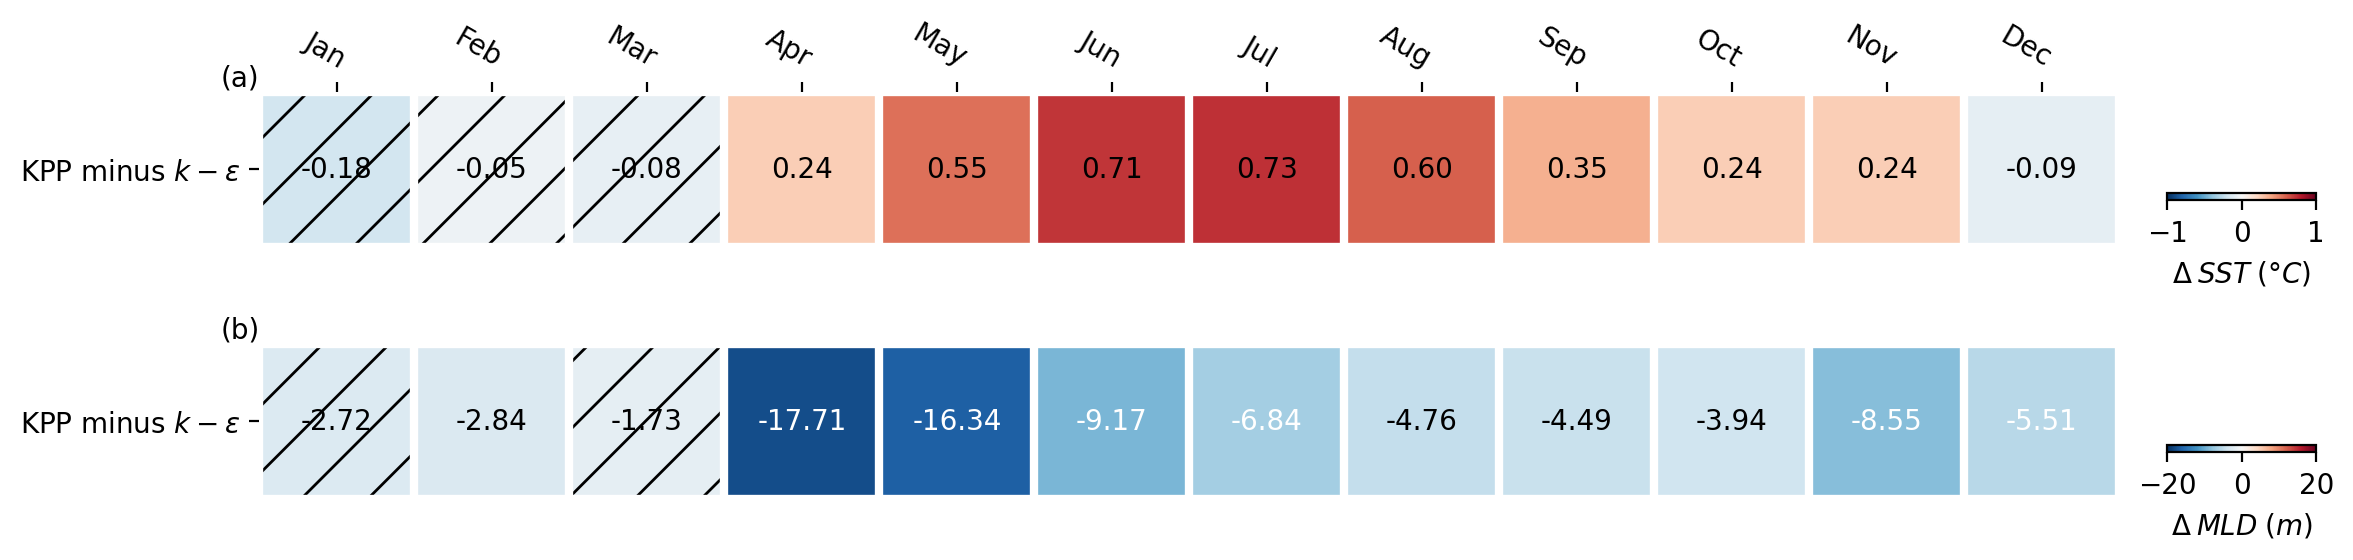

In [7]:
fig, axes = plt.subplots(2, 1, figsize=[12,3], dpi=200, height_ratios=[1,1], sharex=False)
biases = [bias] 
row_labels = ['KPP minus $k-\epsilon$'] 
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# SST
ax = axes[0]; option = 'SST_diffs' 
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap_(yaver_bias, row_labels=row_labels, col_labels=col_labels, ax=ax, cbarlabel="$\Delta \: SST \; (\degree C)$", 
                    XTICK=True, YTICK=True, vmax=1, vmin=-1, cmap='RdBu_r')
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# MLD
ax = axes[1]; option = 'MLD_diffs'  
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap_(yaver_bias, row_labels=row_labels, col_labels=[], ax=ax, cbarlabel=r"$\Delta \: MLD \; (m)$", 
                    XTICK=False, YTICK=True, vmax=20, vmin=-20, cmap='RdBu_r')
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch


labels = ['(a)','(b)']
for i in range(len(axes)):
    axes[i].text(0., 1., labels[i], transform=axes[i].transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# plt.tight_layout()
plt.savefig(f'../plots/updated_heatmap_kpp_ke.pdf', bbox_inches='tight')

### Old plots

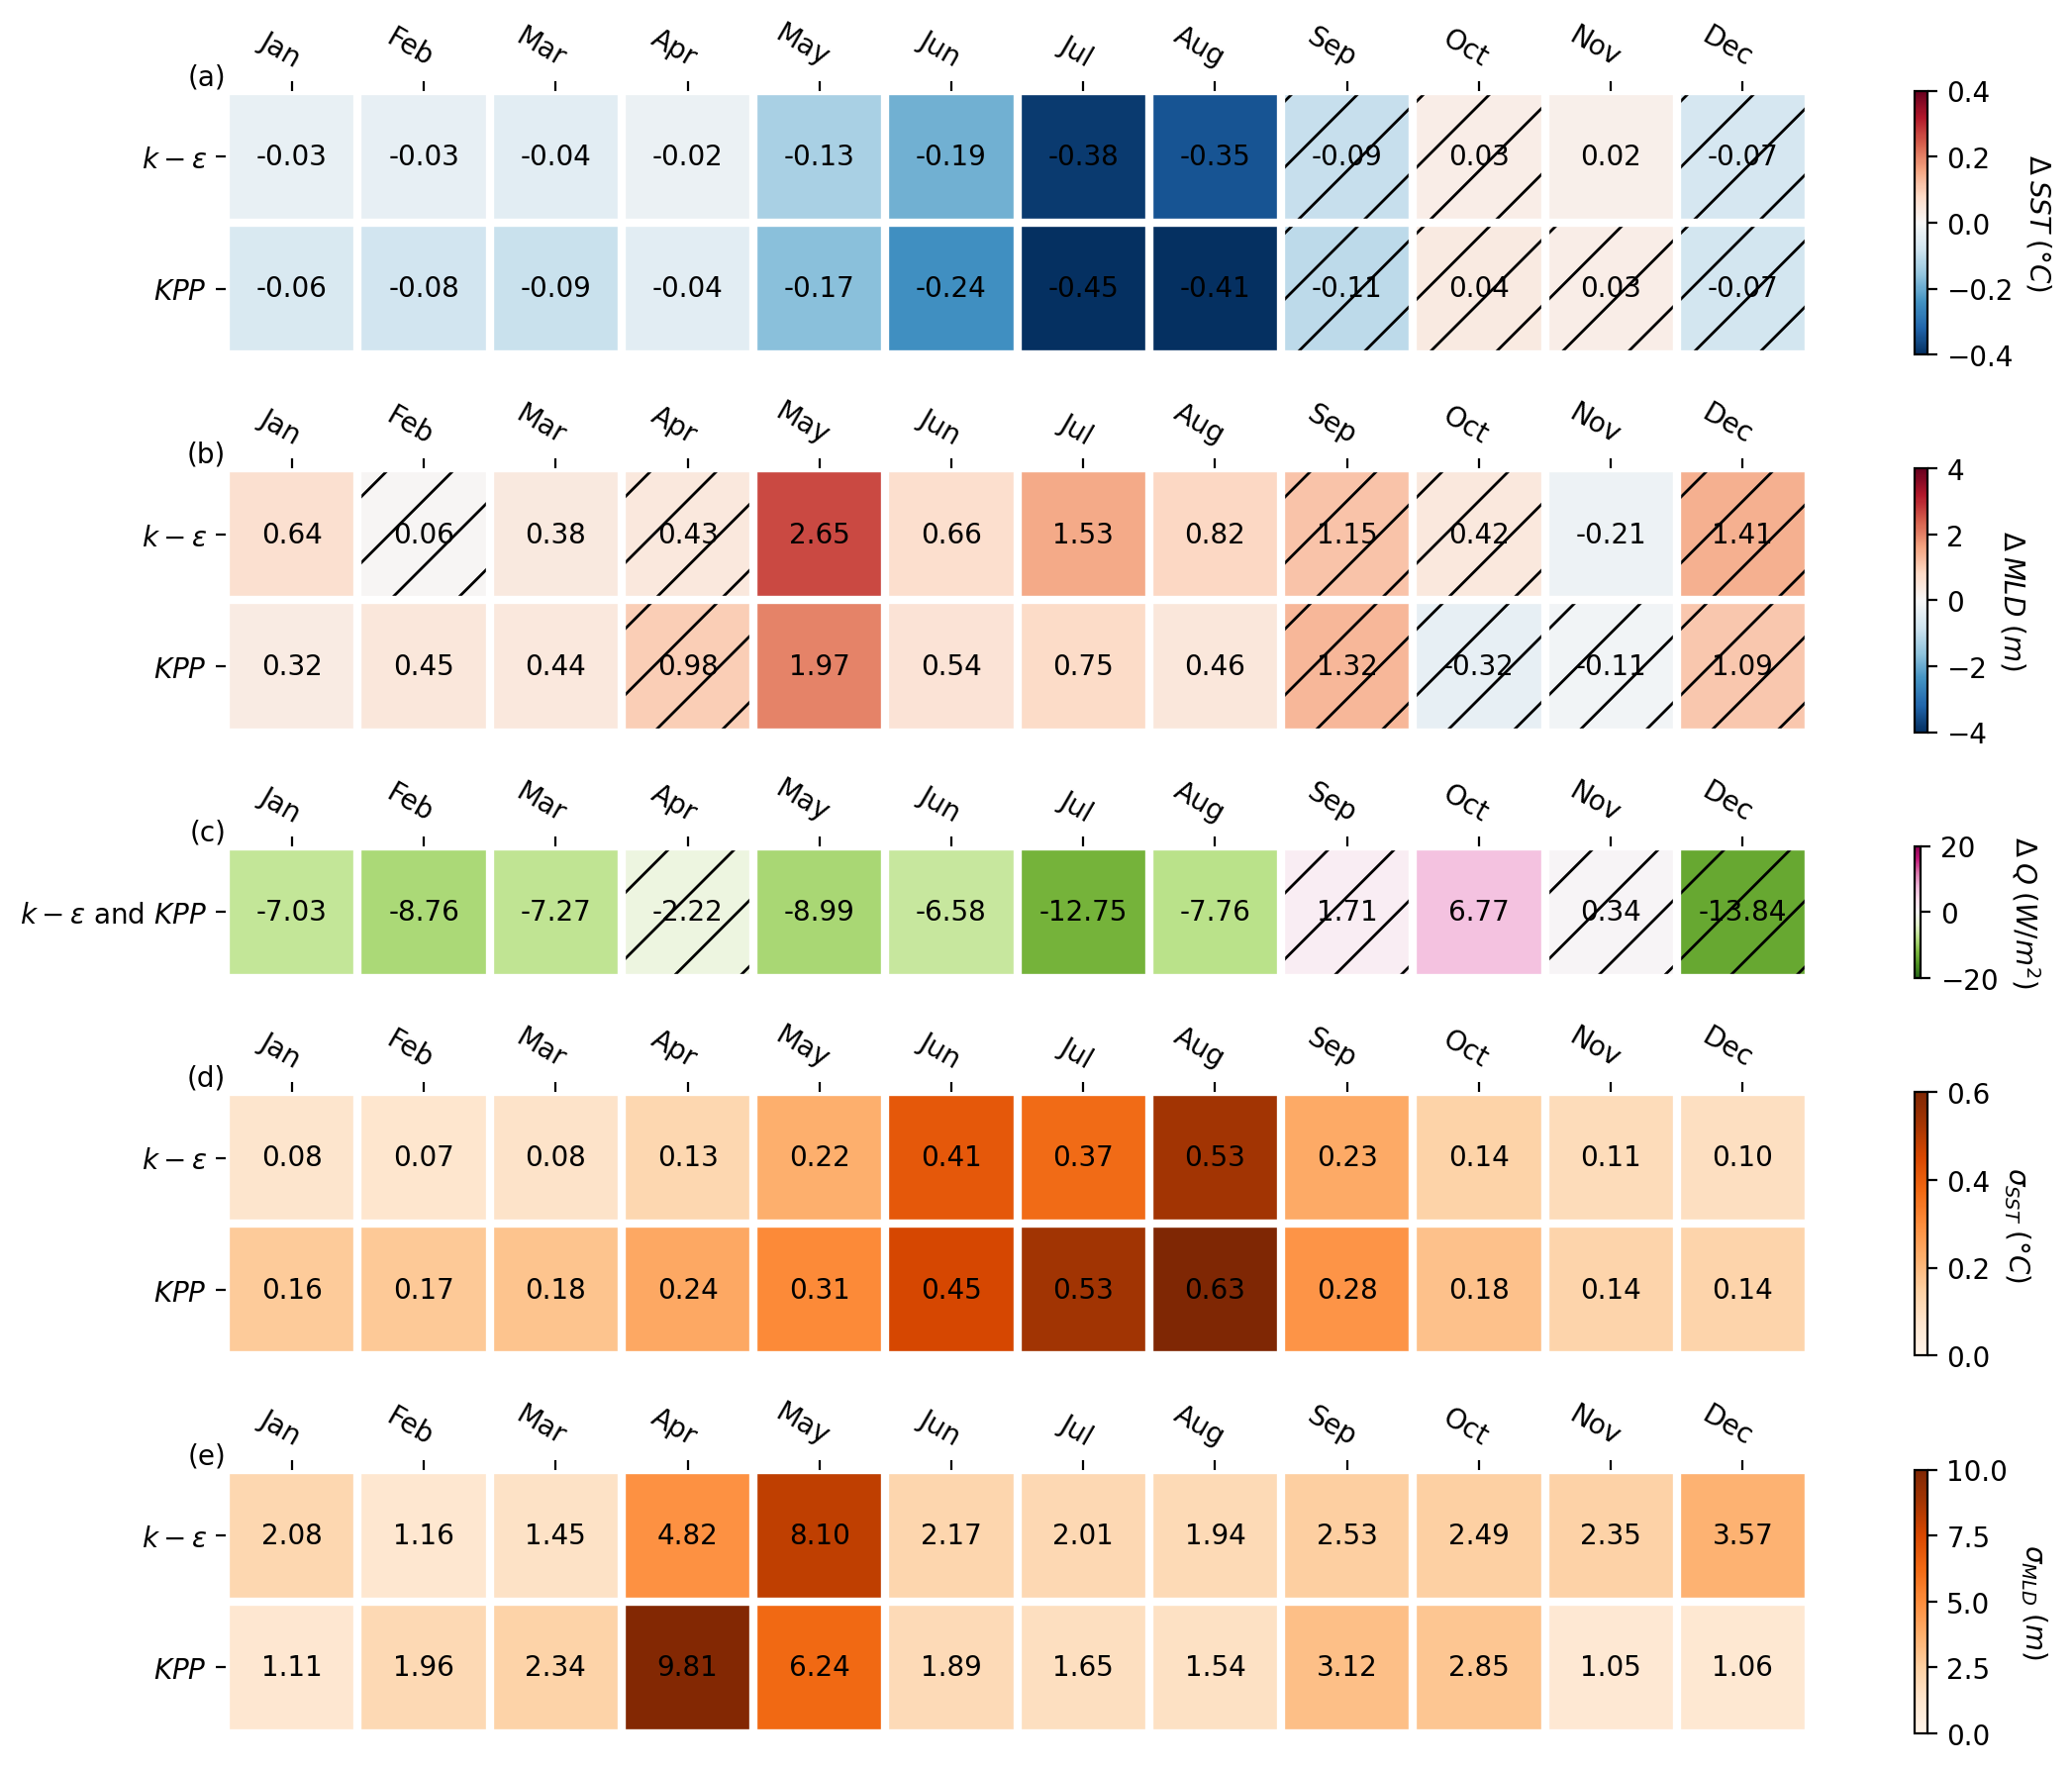

In [ ]:
# Together 
fig, axes = plt.subplots(5, 1, figsize=[12,9], dpi=200, height_ratios=[1,2,2,2,2], sharex=True)
biases = [bias1, bias3] 
row_labels = ['$k-\epsilon$', '$KPP$'] 

# Q
row_labels = ['$k-\epsilon$ and $KPP$']
ax = axes[2]; option = 'Q_diffs' 
yaver_bias = getattr(biases[0], option).mean(axis=0) 
sign_agree = biases[0].checksigns(option) 
yaver_bias = np.array(yaver_bias).reshape(1,-1); sign_agree = np.array(sign_agree).reshape(1,-1)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=20, vmin=-20, cmap='PiYG_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: Q \; (W/m^2)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# SST
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = axes[0]; option = 'SST_diffs' 
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=0.4, vmin=-0.4, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: SST \; (\degree C)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# MLD
ax = axes[1]; option = 'MLD_diffs'  
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=4, vmin=-4, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: MLD \; (m)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch


########## Stochastic ###########
stochs = [stoch1, stoch3] 
row_labels = ['$k-\epsilon$', '$KPP$'] 
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# SST spread
ax = axes[3]; option = 'SST_stds'  
yaver_stds = np.array([getattr(stoch, option).mean(axis=0) for stoch in stochs])
im, cbar = heatmap(yaver_stds, row_labels, col_labels, ax=ax, vmax=0.6, vmin=0, cmap='Oranges', 
                   cbar_kw=None, cbarlabel=r"$\sigma_{SST} \; (\degree C)$")
texts = annotate_heatmap(im, data=yaver_stds, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)

# MLD spread
ax = axes[4]; option = 'MLD_stds'  
yaver_stds = np.array([getattr(stoch, option).mean(axis=0) for stoch in stochs])
im, cbar = heatmap(yaver_stds, row_labels, col_labels, ax=ax, vmax=10, vmin=0, cmap='Oranges', 
                   cbar_kw=None, cbarlabel=r"$\sigma_{MLD} \; (m)$")
texts = annotate_heatmap(im, data=yaver_stds, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)

flabels = ['(a)','(b)','(c)','(d)','(e)']
for i in range(len(axes)):
    axes[i].text(0., 1., flabels[i], transform=axes[i].transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()
# plt.savefig(f'../plots/heatmap_together.png', bbox_inches='tight')